# Analyzing sales made on bike stores. DataSet - [kaggle](https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe)

# 1. First step. Import the necessary libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
Sales=pd.read_csv('/Users/resong/Downloads/Dataset Bike Sales.csv')

In [3]:
# introducing the first 10 lines 
Sales.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [4]:
#get the size
Sales.shape

(113036, 18)

In [5]:
#take value counts
Sales.Product_Category.value_counts()

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

In [6]:
#familiarize with data
Sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

# Data Preprocessing

In [7]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [8]:
# the number of gaps in the data
Sales.isna().values.any()

False

In [9]:
# duplicate value check

Sales.duplicated().values.any()

True

In [10]:
Sales.duplicated().sum()

1000

In [11]:
Sales.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 113036, dtype: bool

In [12]:
Sales = Sales.drop_duplicates()
Sales.shape

(112036, 18)

In [13]:
# duplicate check 
Sales.duplicated().values.any()

False

In [14]:
# replace columns for more convenient calculation, delete old unnecessary values
Sales = Sales.drop(['Profit', 'Cost', 'Revenue'], axis =1)

In [15]:
Sales.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120


In [16]:
# add new values to be used in the analysis

Sales['Total_Cost'] = Sales['Order_Quantity'] * Sales['Unit_Cost']
Sales['Revenue'] = Sales['Order_Quantity'] * Sales['Unit_Price']
Sales['Profit'] = Sales['Revenue'] - Sales['Total_Cost']
Sales.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600


# Stage 2.  Exploratory analysis and search for patterns

In [17]:
print(f'Average age of customers: {round(Sales["Customer_Age"].mean())} лет')

Average age of customers: 36 лет


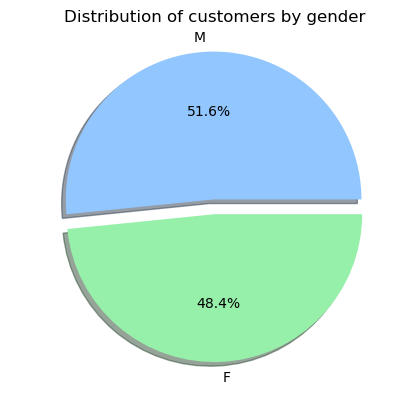

In [18]:
with plt.style.context('seaborn-pastel'):
    Sales['Customer_Gender'].value_counts().plot(kind='pie',
                                y='Customer_Gender',
                                autopct='%1.1f%%',
                                ylabel=' ',
                                shadow=True,
                                explode=(0.1,0),
                                title = 'Distribution of customers by gender');

In [19]:
Sales['Customer_Gender'].value_counts()

Customer_Gender
M    57813
F    54223
Name: count, dtype: int64

In [20]:
with plt.style.context('seaborn-pastel'):
    Sales['Product_Category'].value_counts().head(5).plot(kind='pie',
                                y='items',
                                autopct='%1.1f%%',
                                ylabel=' ',
                                shadow=True,
                                title = 'Sales by product category');

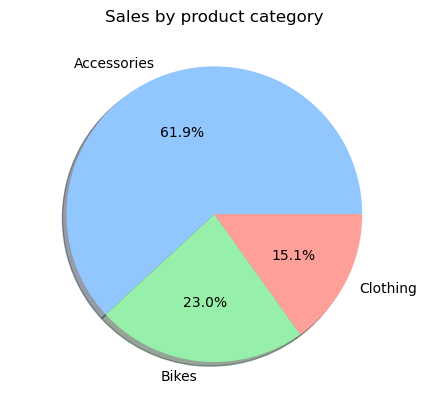

In [21]:
plt.show()

In [22]:
Sales["Customer_Age"].plot(kind='kde',figsize=(12,6))
plt.title("Sales depending on the age of the customer",fontsize=15)
plt.xlabel("Age of the customer",fontsize=12)
plt.ylabel("Sales",fontsize=12)
plt.legend()

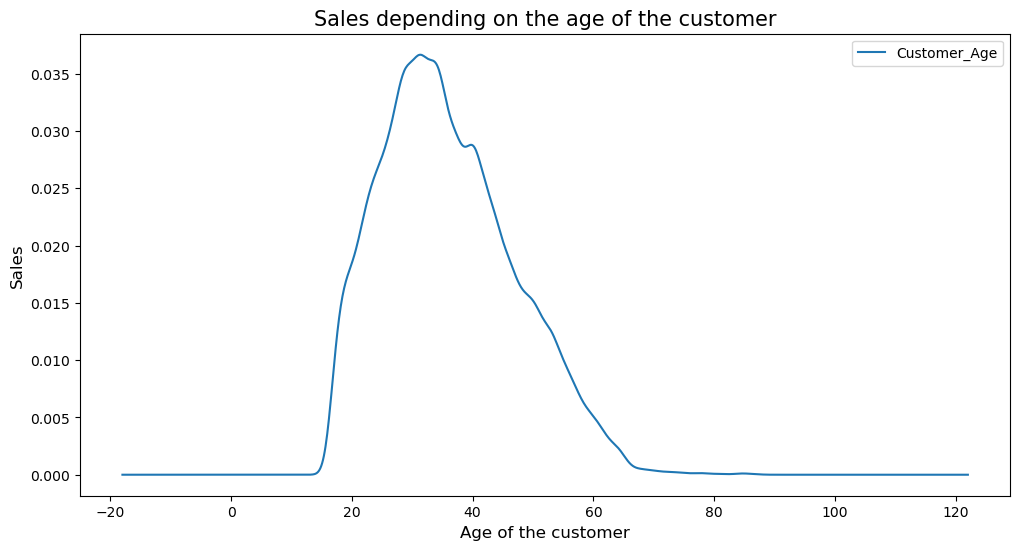

In [23]:
plt.show()

In [24]:
Sales['Year'].value_counts()

Year
2016    29128
2014    29122
2015    24227
2013    24224
2011     2671
2012     2664
Name: count, dtype: int64

In [25]:
with plt.style.context('seaborn-pastel'):
    Sales["Year"].value_counts().plot(kind="bar",figsize=(16,6))

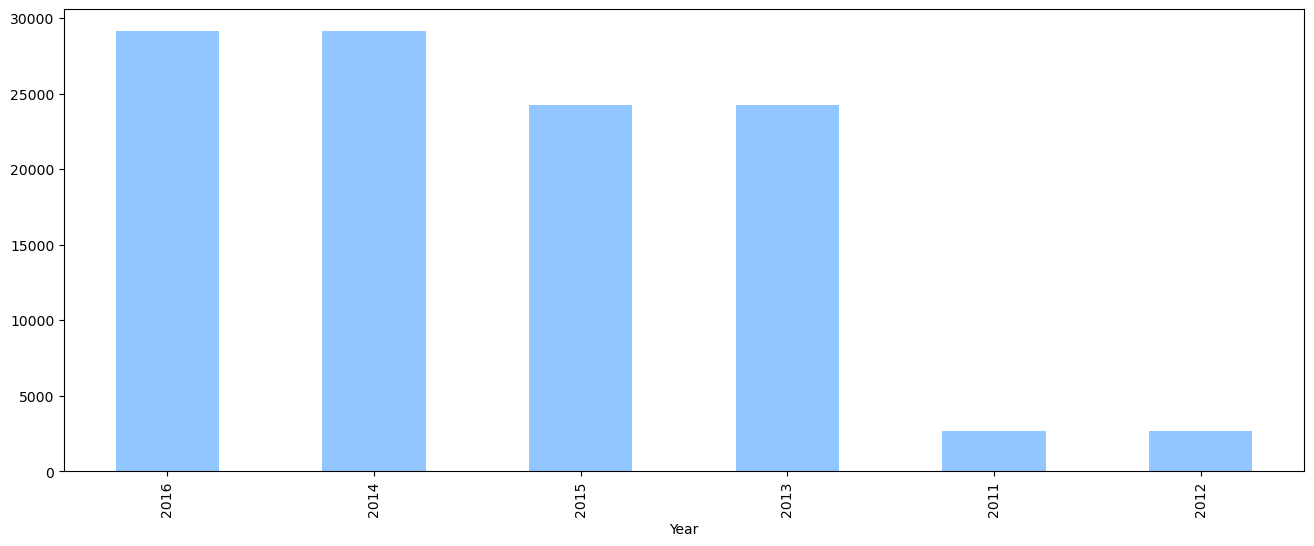

In [26]:
plt.show()

In [27]:
Sales['Month'].value_counts()

Month
June         11127
December     11109
May          11019
April        10090
March         9591
January       9192
February      8956
October       8678
November      8646
August        8128
September     8100
July          7400
Name: count, dtype: int64

In [28]:
with plt.style.context('seaborn-pastel'):
    Sales["Month"].value_counts().plot(kind="bar",figsize=(12,6))
plt.legend()

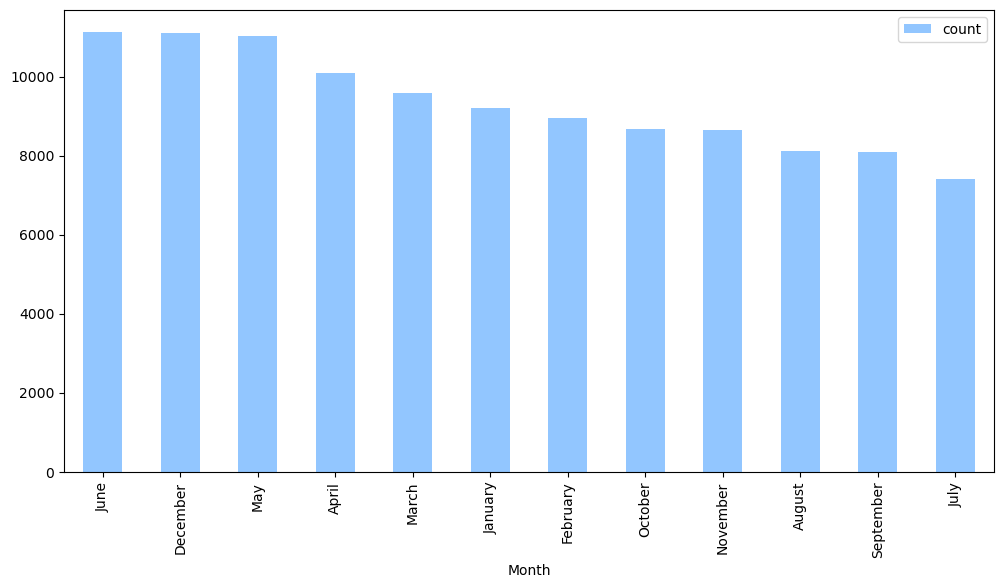

In [29]:
plt.show()

In [30]:
Sales['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55358
Young Adults (25-34)    38299
Youth (<25)             17660
Seniors (64+)             719
Name: count, dtype: int64

In [31]:
Sales["Age_Group"].value_counts().plot(kind='bar',figsize=(14,6))
plt.legend()
plt.legend()
plt.ylabel("Sales")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

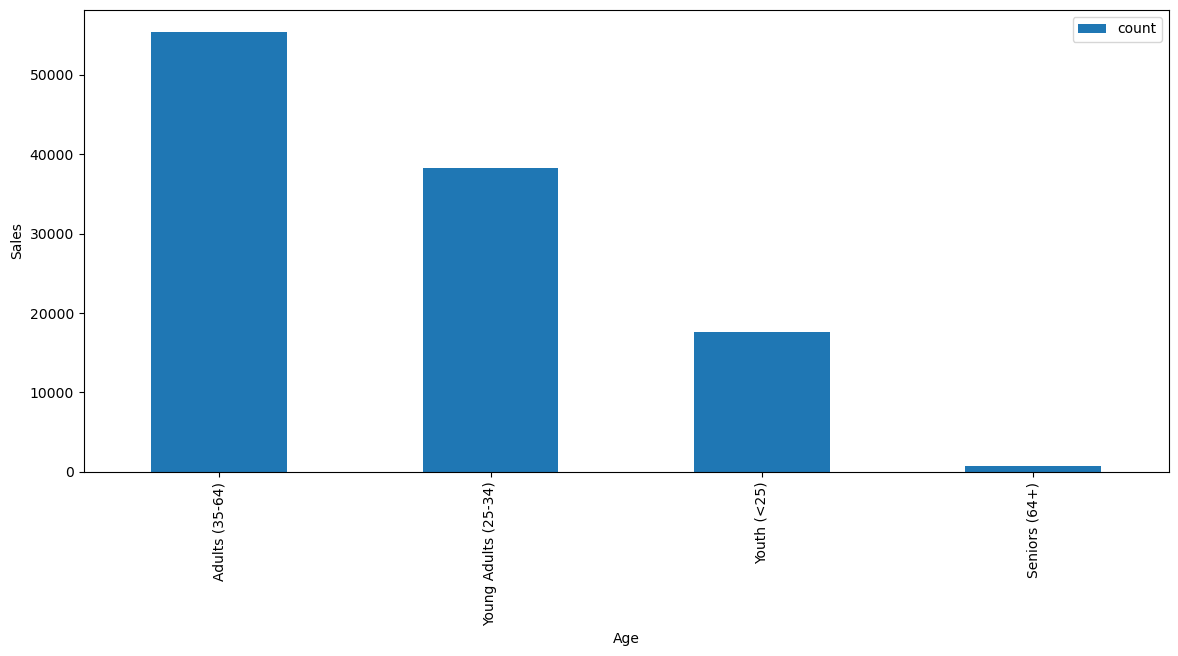

In [32]:
plt.show()

In [33]:
with plt.style.context('seaborn-pastel'):
    Sales["Age_Group"].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Sales by age groups")

Text(0.5, 1.0, 'Sales by age groups')

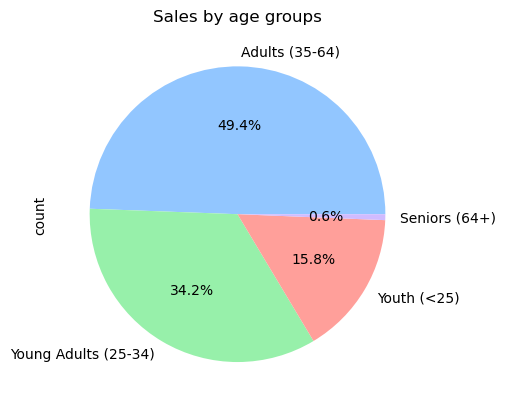

In [34]:
plt.show()

In [35]:
# Get the top-5 sales with the highest revenue
Sales.sort_values(['Revenue'],ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Total_Cost,Revenue,Profit
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,42978,69136,26158
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,40014,64368,24354
70801,2011-01-26,26,January,2011,35,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,8684,14312,5628
58561,2011-12-05,5,December,2011,60,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,8684,14312,5628
58161,2011-05-25,25,May,2011,53,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,8684,14312,5628


In [36]:
# Get the sale with the highest revenue
Sales['Revenue'].max()

69136

In [37]:
Sales['Country'].value_counts()

Country
United States     38840
Australia         23736
Canada            14027
United Kingdom    13486
Germany           11027
France            10920
Name: count, dtype: int64

In [38]:
Sales['Country'].value_counts().plot(kind='bar',figsize=(12,4))
plt.title("Sales in each country",fontsize=17)
plt.ylabel("Sales",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.legend()

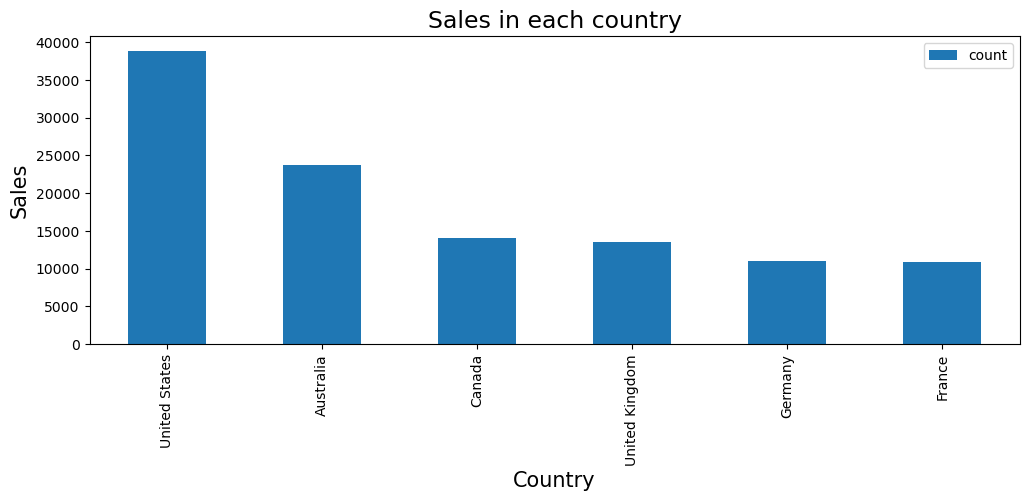

In [39]:
plt.show()

In [40]:
MostSales=Sales.loc[: ,"Product"].unique()
# sales['Product'].unique()

In [41]:
Sales.loc[: ,"Product"].value_counts().head(10).plot(kind='bar',figsize=(14,5))
plt.title("List of Products Sales",fontsize=17)
plt.ylabel("Number of Products",fontsize=15)
plt.xlabel("Products",fontsize=15)
plt.legend()

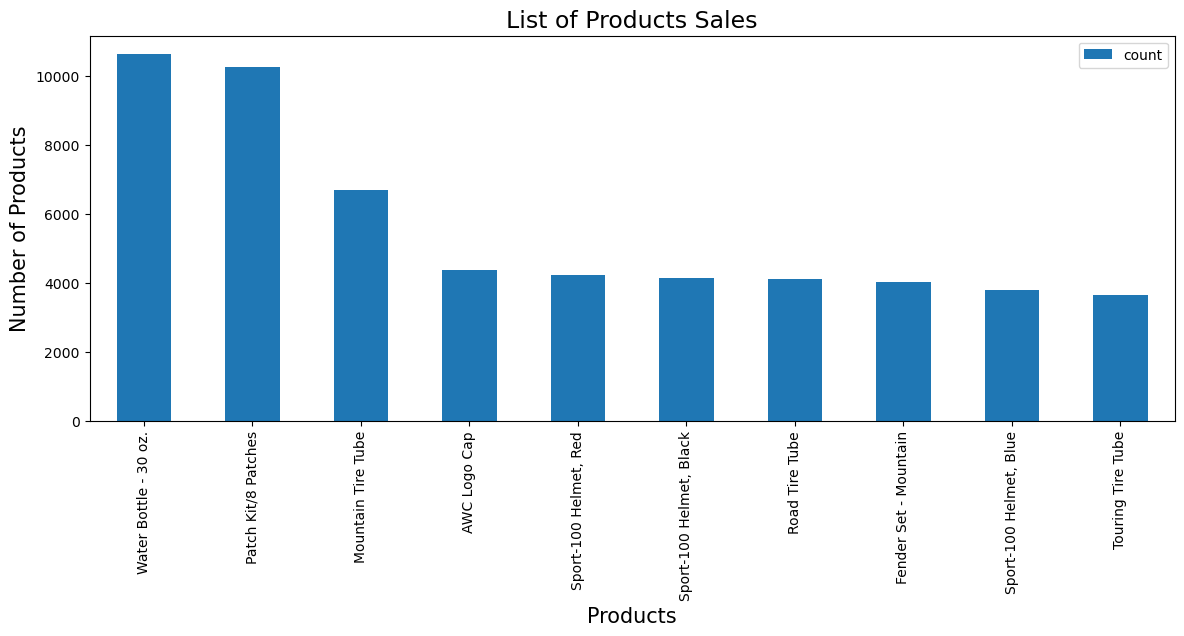

In [42]:
plt.show()

In [43]:
with plt.style.context('seaborn-pastel'):
    Sales.plot(kind='scatter',x="Unit_Cost", y="Unit_Price",figsize=(12,4),fontsize=10)
plt.title("Relationship between unit cost of production and unit price of production",fontsize=17)
plt.ylabel("Unit Price",fontsize=15)
plt.xlabel("Unit Cost",fontsize=15)

Text(0.5, 0, 'Unit Cost')

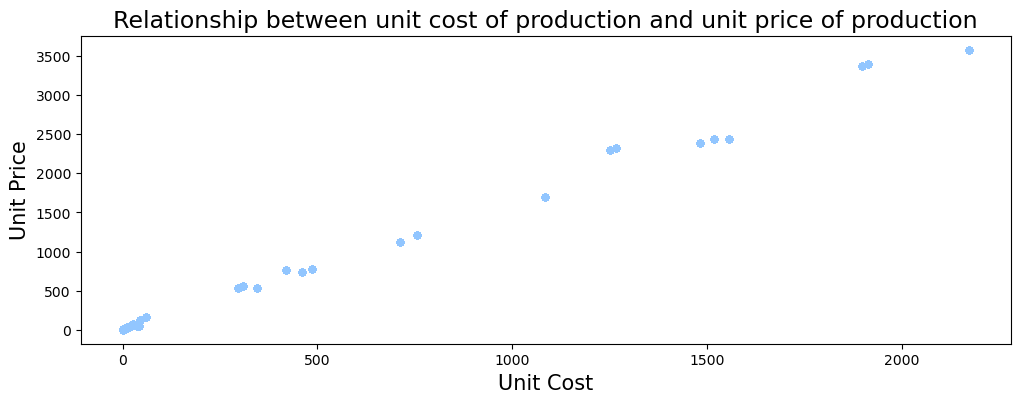

In [44]:
plt.show()

In [45]:
Sales.loc[Sales["Country"]=="France","State"].value_counts()

State
Seine (Paris)        2315
Seine Saint Denis    1676
Nord                 1655
Hauts de Seine       1074
Essonne               985
Yveline               943
Seine et Marne        390
Moselle               384
Loiret                380
Val d'Oise            264
Garonne (Haute)       207
Val de Marne          157
Charente-Maritime     147
Somme                 133
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

In [46]:
with plt.style.context('seaborn-pastel'):
    Sales.loc[Sales["Country"]=="France","State"].value_counts().plot(kind='bar',figsize=(16,5))
plt.title("Sales in every region of France",fontsize=17)
plt.ylabel("Number of Sales",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.legend()

plt.legend()

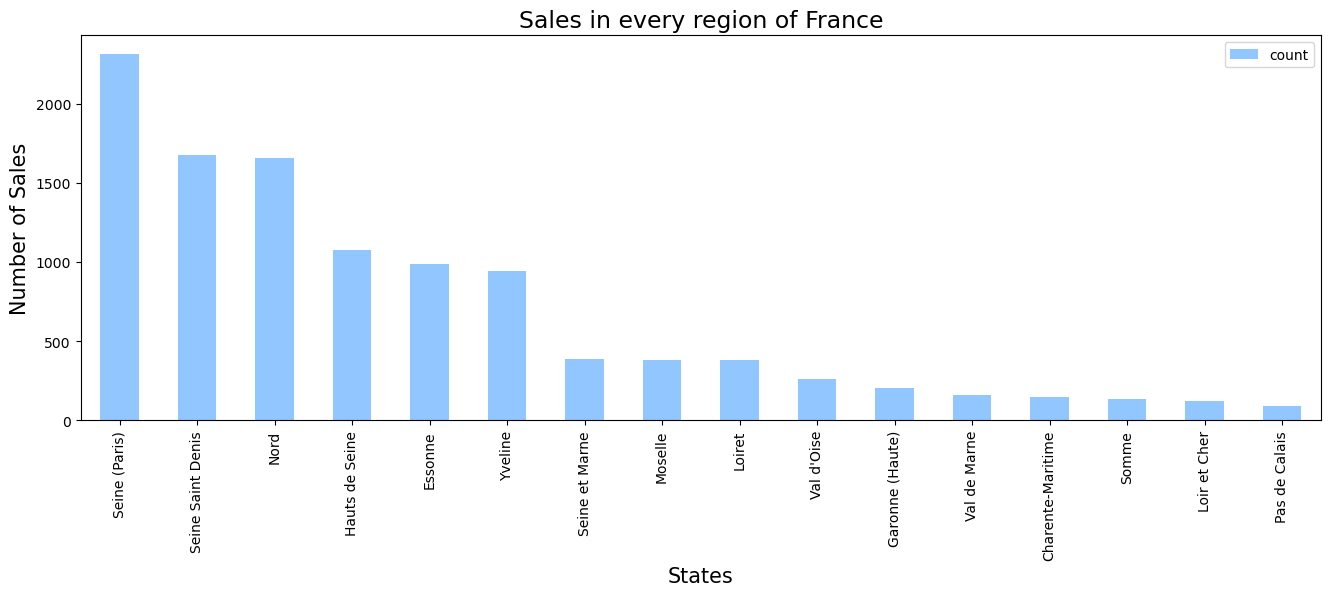

In [47]:
plt.show()

In [48]:
# How many sales were made per category?
Sales['Sub_Category'].value_counts()

Sub_Category
Tires and Tubes      33298
Bottles and Cages    15649
Road Bikes           13313
Helmets              12150
Mountain Bikes        8803
Jerseys               6006
Caps                  4358
Fenders               4032
Touring Bikes         3678
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            455
Name: count, dtype: int64

In [49]:
with plt.style.context('seaborn-pastel'):
    Sales['Product_Category'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%',fontsize=12)
Cat=Sales['Sub_Category'].unique()
plt.title("Products Category",fontsize=15)
plt.legend(fontsize=12,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

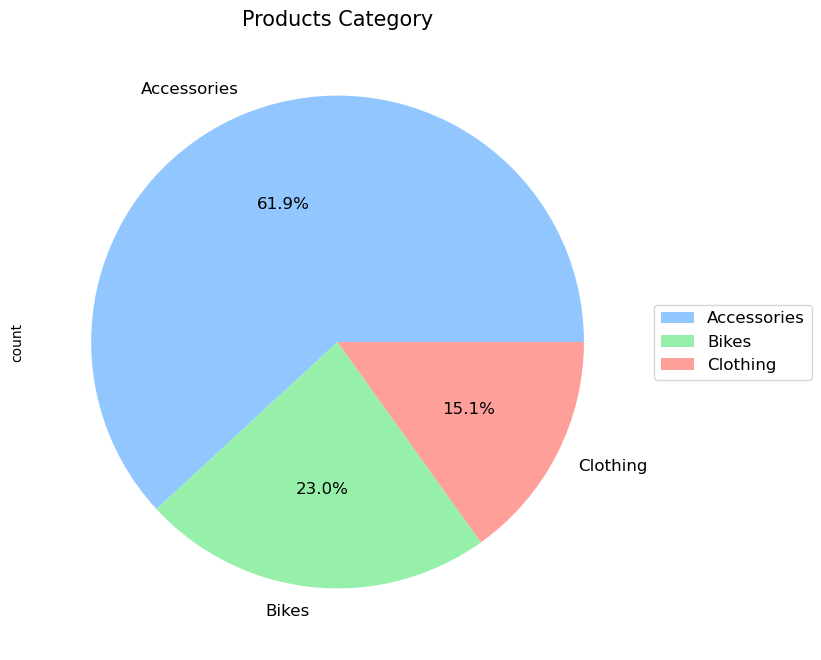

In [50]:
plt.show()

In [51]:
Sales["Sub_Category"].value_counts()

Sub_Category
Tires and Tubes      33298
Bottles and Cages    15649
Road Bikes           13313
Helmets              12150
Mountain Bikes        8803
Jerseys               6006
Caps                  4358
Fenders               4032
Touring Bikes         3678
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            455
Name: count, dtype: int64

In [52]:
Sales.loc[Sales['Product_Category']=='Accessories' ,"Sub_Category"].value_counts()

Sub_Category
Tires and Tubes      33298
Bottles and Cages    15649
Helmets              12150
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            455
Name: count, dtype: int64

In [53]:
Sales.loc[Sales['Product_Category']=='Accessories' ,"Sub_Category"].value_counts().plot(kind="bar",figsize=(16,4))
plt.legend()

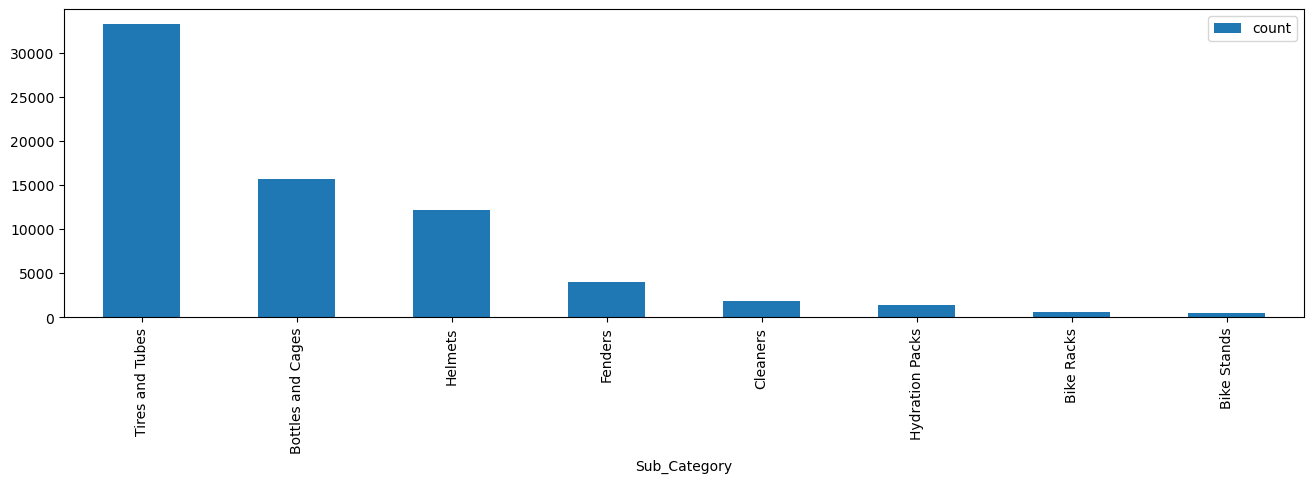

In [54]:
plt.show()

In [55]:
Sales.loc[Sales['Product_Category']=="Bikes","Sub_Category"].value_counts()

Sub_Category
Road Bikes        13313
Mountain Bikes     8803
Touring Bikes      3678
Name: count, dtype: int64

In [56]:
Pc=Sales.loc[Sales['Product_Category']=="Bikes","Sub_Category"].unique()
with plt.style.context('seaborn-pastel'):
    Sales.loc[Sales['Product_Category']=="Bikes","Sub_Category"].value_counts().plot(kind="pie",figsize=(8,8),fontsize=12)
plt.legend(fontsize=13,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Products Category in Bikes",fontsize=15)

Text(0.5, 1.0, 'Products Category in Bikes')

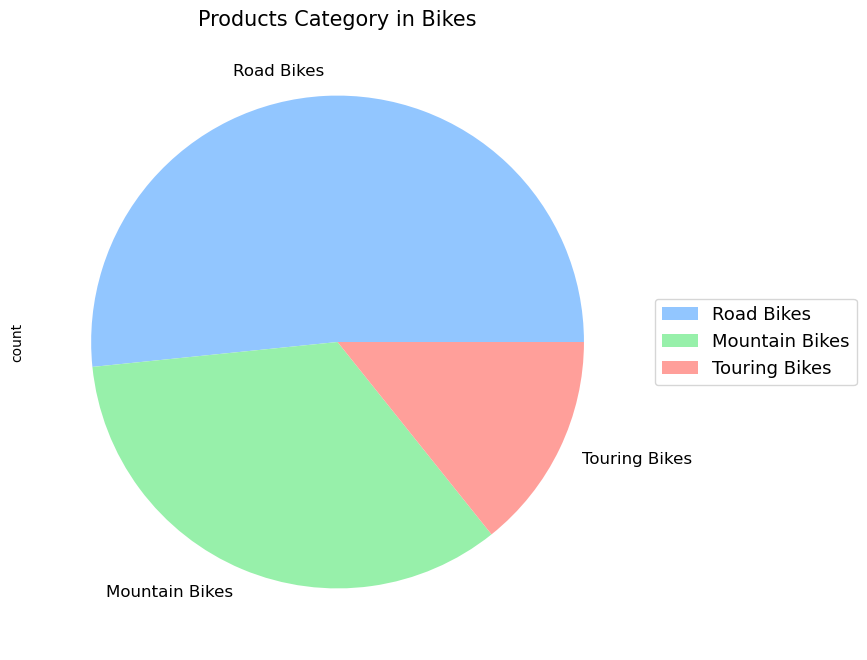

In [57]:
plt.show()